# Think Green Investing 

## Data Preparation

In [365]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

In [366]:
#intializing alpaca trade api
load_dotenv()
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')
alpaca=tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version='v2')

In [367]:
#function that pulls tickers daily closing prices in the given time period using alpaca trade api, 
#intialization of the api is required before using.
#It returns a dataframe with the tickers, and closing prices as two level column structured datafram with index defined as date  

def get_tickers_data(tickers, start_date, end_date, timeframe):
    start_date = pd.Timestamp(start_date, tz = "America/New_York").isoformat()
    end_date = pd.Timestamp(end_date, tz = "America/New_York").isoformat()
    tickers_data_df = alpaca.get_bars(tickers, timeframe,start_date , end_date, adjustment = 'raw').df
    tickers_data_df.index = tickers_data_df.index.date
    tickers_data_df = tickers_data_df[['symbol', 'close']]
    tickers_data_list=[]
    for ticker in tickers:
        tickers_data_list.append(tickers_data_df[tickers_data_df['symbol']==ticker].drop('symbol', axis=1))
        
    clean_tickers_data = pd.concat(tickers_data_list,axis=1, keys=tickers)
    return clean_tickers_data

In [368]:
def calculate_plot_returns(tickers_data, portfolio, indices):
    # obtain daily returns 
    daily_returns = tickers_data.pct_change()
    daily_returns.dropna(inplace=True)
    #Calculate and plot cummulative returns 
    cumulative_returns = daily_returns.cumsum()
    cumulative_returns_plot = cumulative_returns.plot(figsize=(20,10))
    #Calculate and plot cummulative return for the portfolio
    daily_returns2 = daily_returns.drop(columns=indices)
    daily_returns2['Portfolio']=daily_returns2.mean(axis=1)
    daily_returns3 = pd.concat((daily_returns2,daily_returns[indices]) ,axis="columns", join="inner")
    daily_returns3.columns = [ portfolio + ['Portfolio'] + indices]
    cumulative_returns2 = daily_returns3.cumsum()
    #Compare average cummulative performance of portfolio vs SP500 during war
    avg_performance = cumulative_returns2.drop(columns = portfolio).plot(figsize=(20,10), title="Cumulative Returns in Five Years")
    return daily_returns3

In [369]:
def risk_analysis(daily_returns,portfolio, indices):  
    # Box plot to visually show risk
    daily_returns_std = daily_returns.std()
    ylimit = daily_returns_std.max()*5
    box_plot = daily_returns.plot.box(figsize=(20, 10), title="Stock Risk Analysis", ylim = [-ylimit,ylimit])
    # Calculate the correlation between port and indices
    correlations = daily_returns.drop(columns = portfolio).corr()
    # Display de correlation matrix
    d_plot = plt.figure()
    heatmap = sn.heatmap(correlations, annot=True)
  
    # Calculate the sharp ratio for port and indices
    
    return daily_returns_std

In [370]:
#defining the stocks in the solar energy portfolio form top performers in 2021 using mootley fool and investopedia. The companies are:
#1.First Solar (FSLR)
#2.Brookfield Renewable (BEPC) --> removed 
#3.Solar Edge Technologies (SEDG)
#4.Daqo New Energy Corp. (DQ)
#5.Canadian Solar INC (CSIQ)

portfolio =  ['FSLR' , 'SEDG', 'DQ','CSIQ']
indices = ['SPY', 'NDAQ']
timeframe='1Day'




### Five Year Period Jan 2018 to April 2022

C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


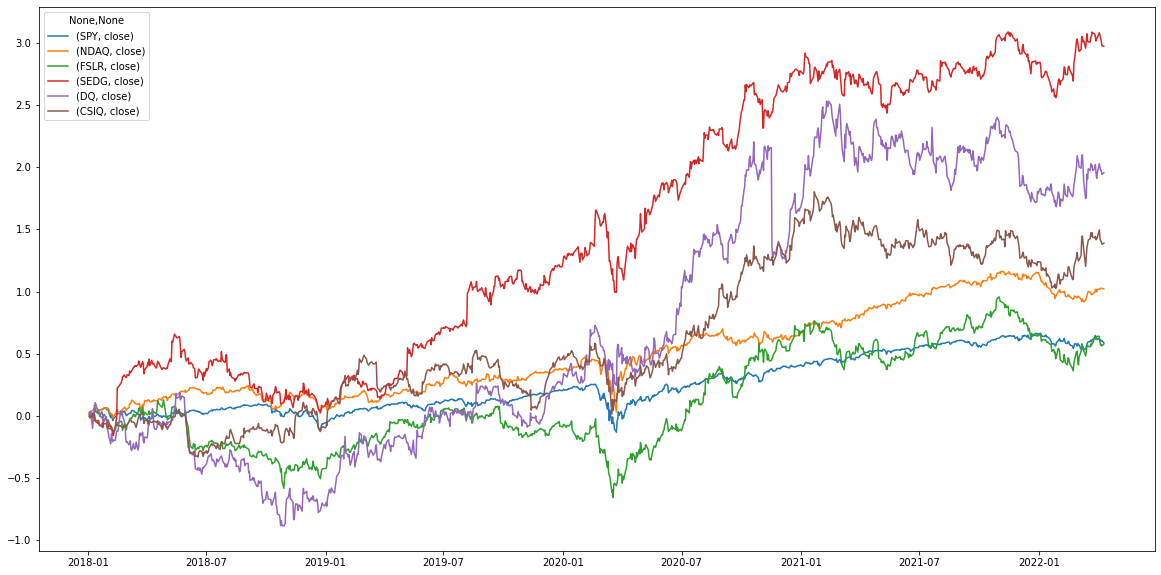

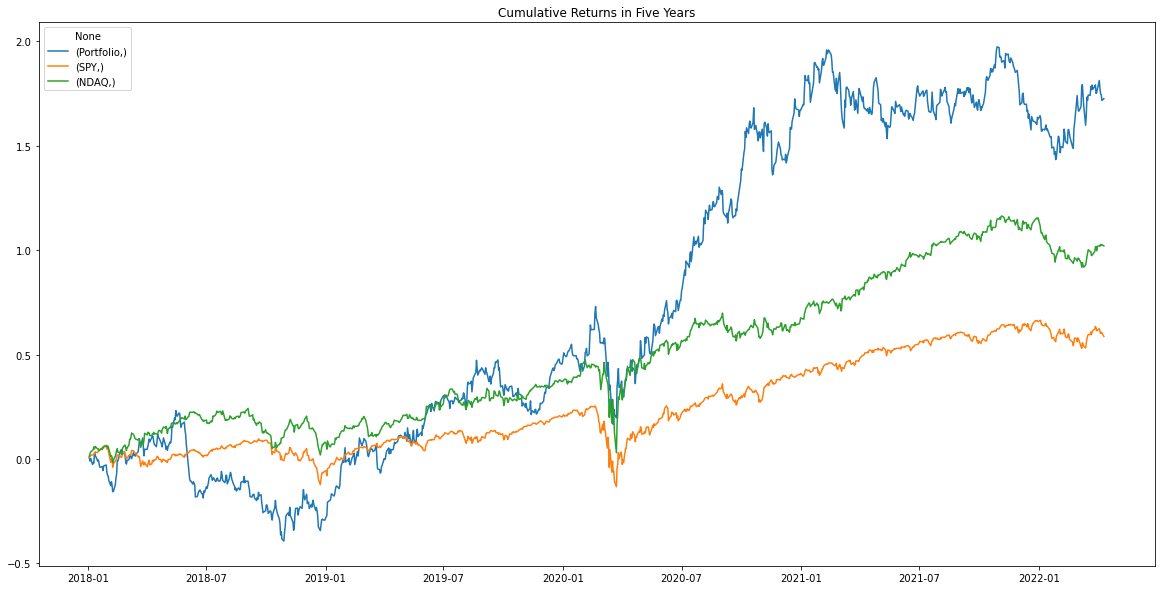

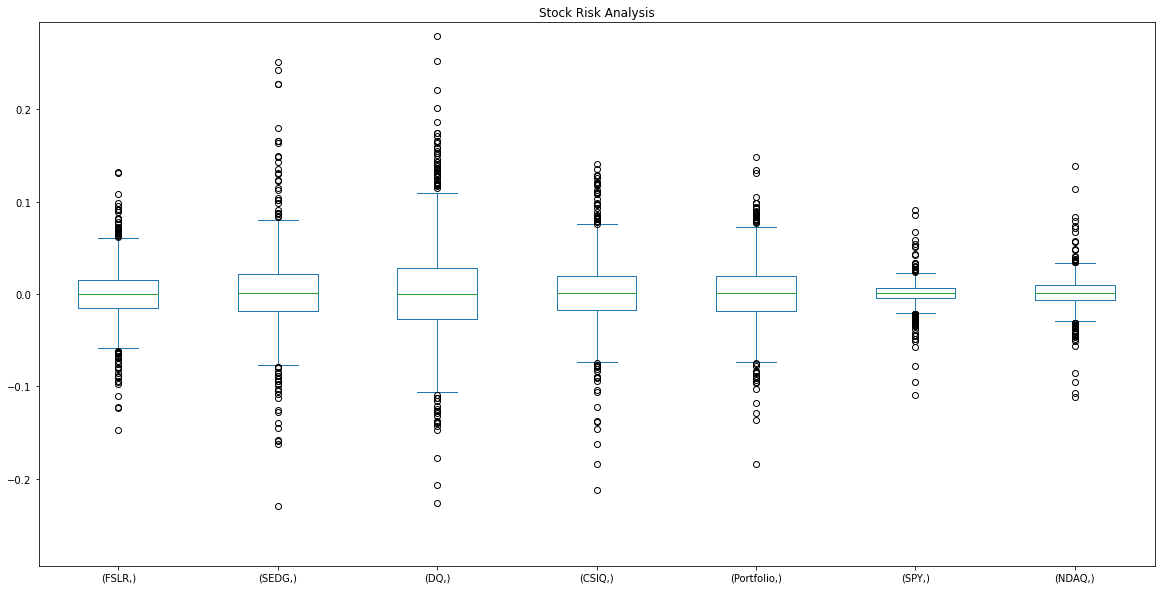

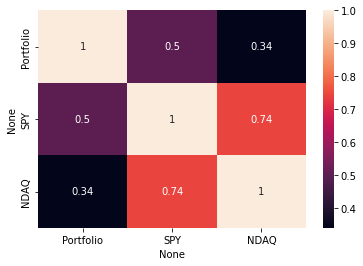

In [371]:
start_date = '2018-01-01'
end_date = '2022-04-11'

tickers_data_five_years = get_tickers_data(tickers, start_date, end_date, timeframe) 
daily_returns_five_years = calculate_plot_returns(tickers_data_five_years, portfolio, indices)
daily_returns_five_years_std = risk_analysis(daily_returns_five_years,portfolio, indices)


### Wartime Feb 2022 to April 2022

C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


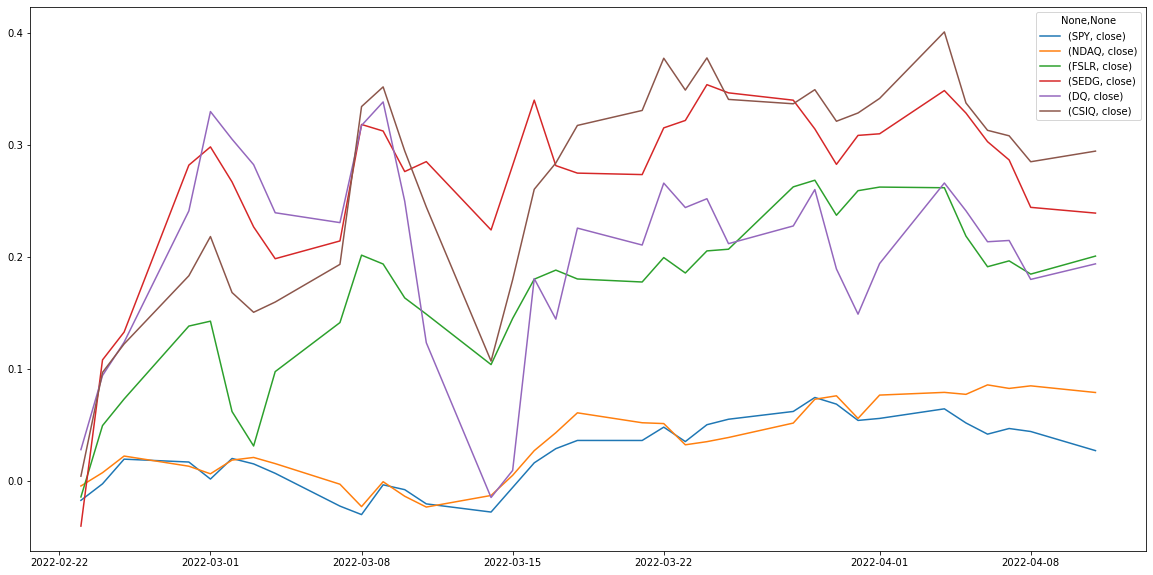

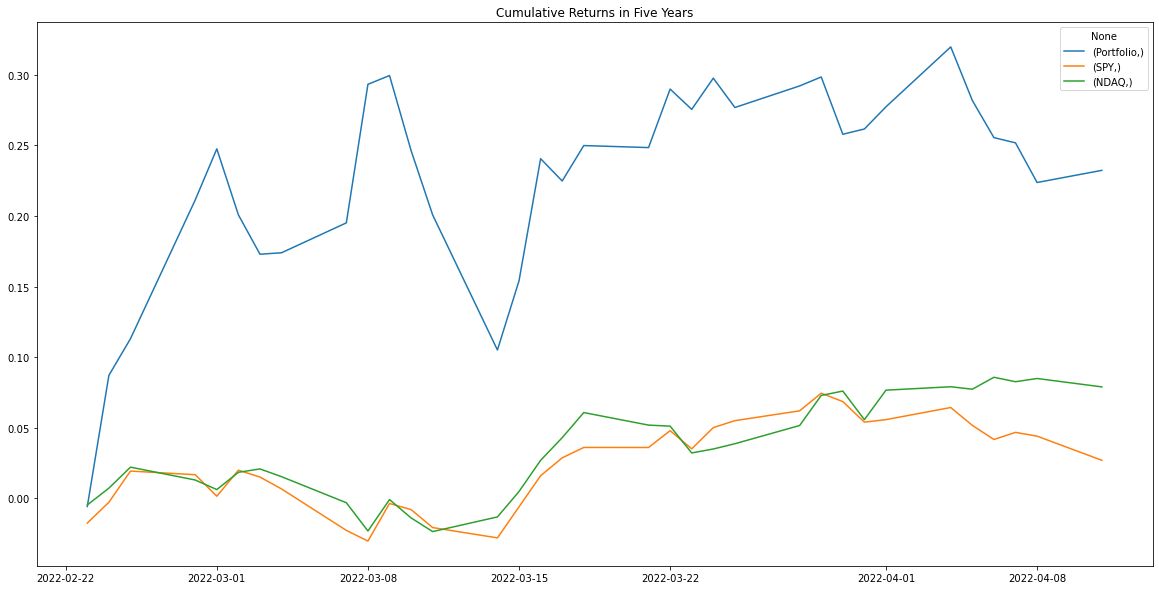

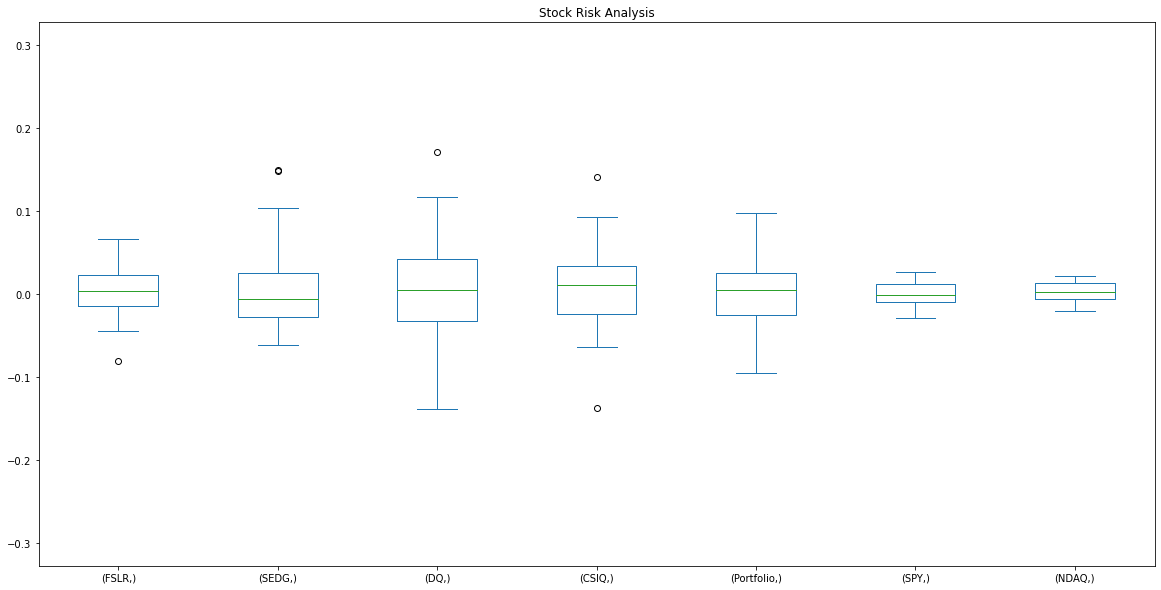

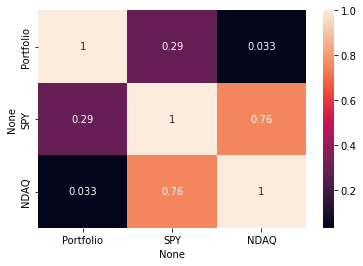

In [372]:
start_date_war = '2022-02-20'
end_date_war = '2022-04-11'

tickers_data_wartime = get_tickers_data(tickers, start_date_war, end_date_war, timeframe) 
daily_returns_wartime = calculate_plot_returns(tickers_data_wartime, portfolio, indices)
daily_returns_wartime_std = risk_analysis(daily_returns_wartime,portfolio, indices)

## Covid Time (Jan 2020 to Feb 2022)

C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


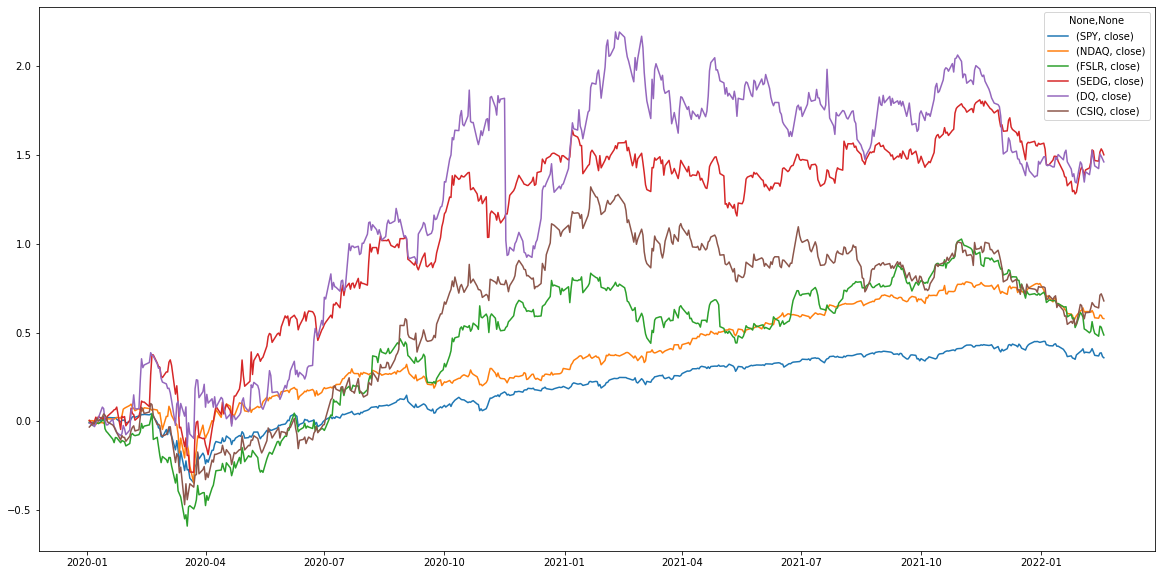

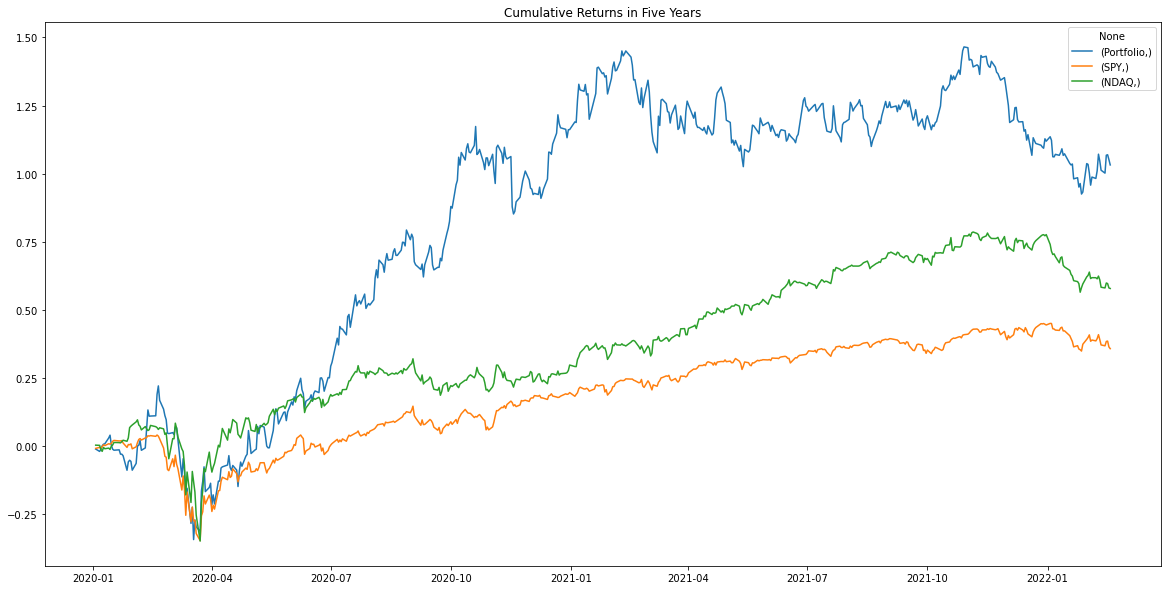

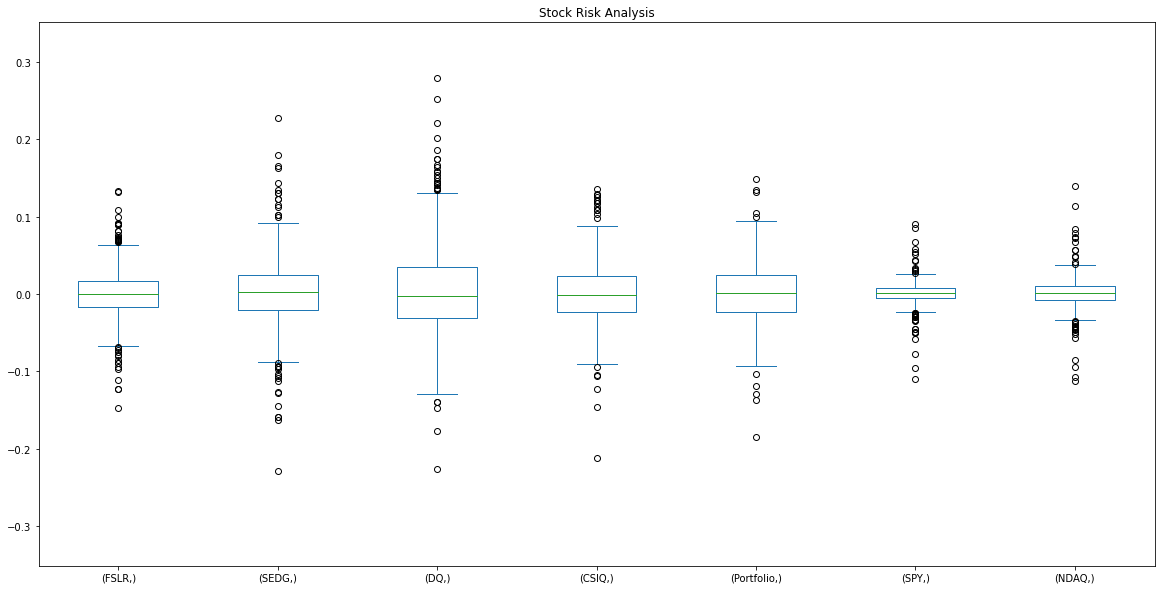

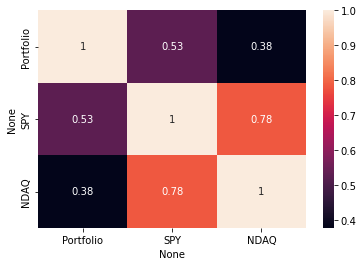

In [373]:
# COVID time frame (~2 years)
start_date_covid = '2020-01-01'
end_date_covid = '2022-02-19'
tickers_data_covid = get_tickers_data(tickers, start_date_covid, end_date_covid, timeframe) 
daily_returns_covid = calculate_plot_returns(tickers_data_covid, portfolio, indices)
daily_returns_covid_std = risk_analysis(daily_returns_covid,portfolio, indices)

## Pre Covid time (Jan 2018 to Dec 2019)

C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\amany\Anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


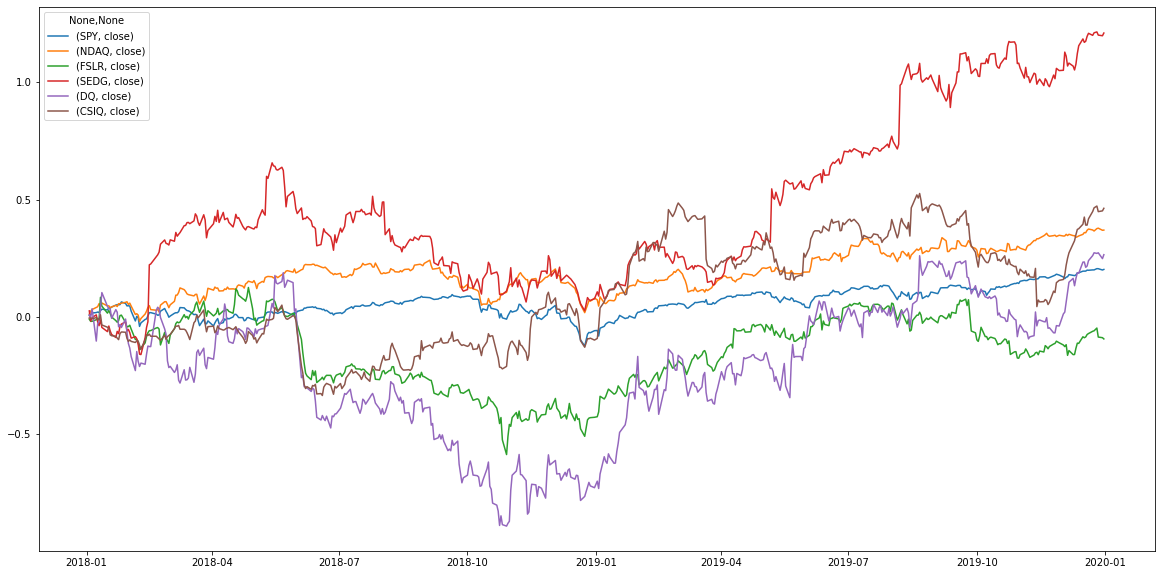

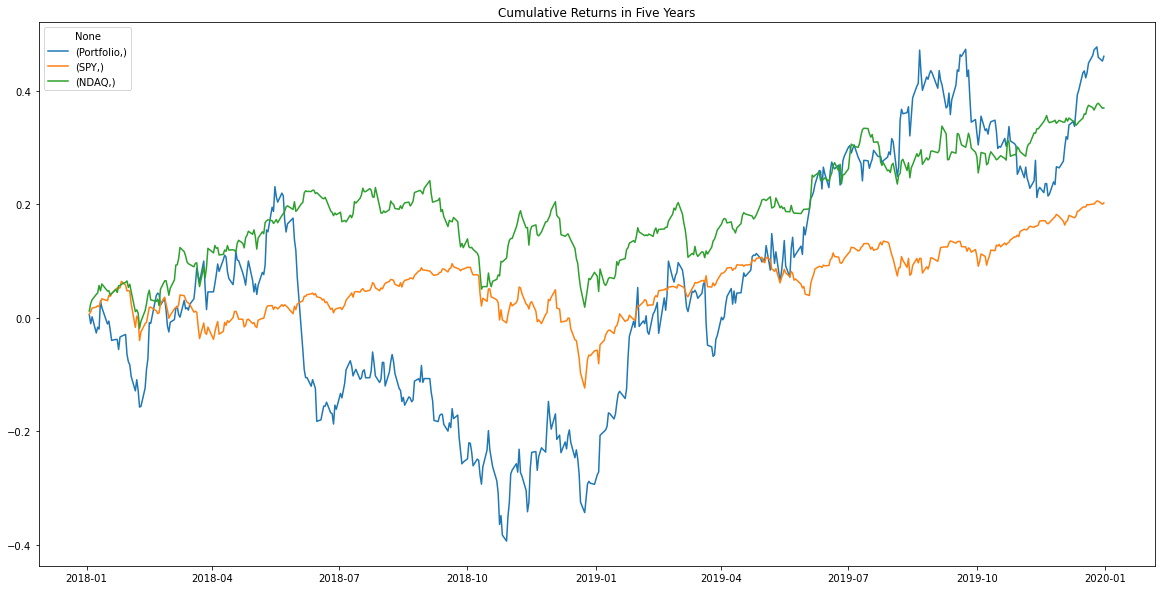

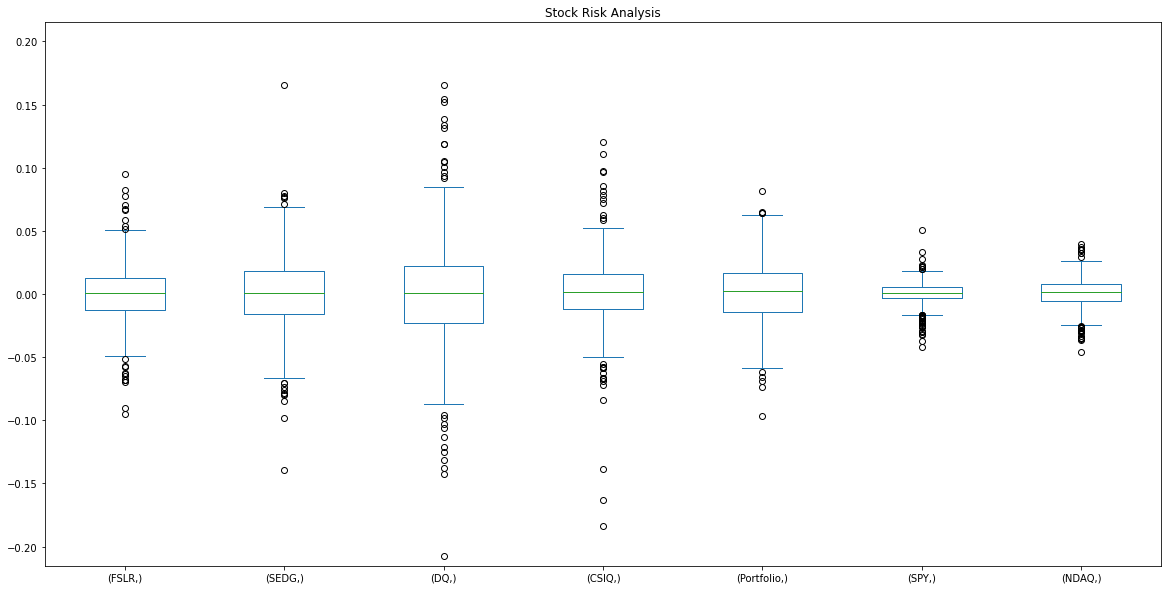

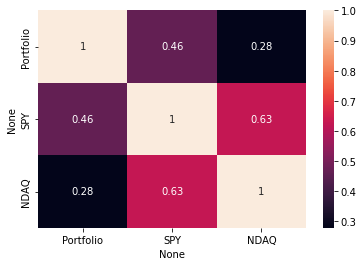

In [375]:
# pre-Covid time frame (2 years)
start_date_pre_covid = '2018-01-01'
end_date_pre_covid = '2019-12-31'
tickers_data_pre_covid = get_tickers_data(tickers, start_date_pre_covid, end_date_pre_covid, timeframe)
daily_returns_pre_covid = calculate_plot_returns(tickers_data_pre_covid, portfolio, indices)
daily_returns_pre_covid_std = risk_analysis(daily_returns_pre_covid,portfolio, indices)